In [3]:
#library
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os
print(os.listdir("../data"))

['gender_submission.csv', 'test.csv', 'train.csv']


## Data Dictonary

    Variable	Definition	    Key
    survival	Survival	    0 = No, 1 = Yes
    pclass	  Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
    sex	     Sex	
    Age	     Age in years	
    sibsp	   # of siblings / spouses aboard the Titanic	
    parch	   # of parents / children aboard the Titanic	
    ticket	  Ticket number	
    fare	    Passenger fare	
    cabin	   Cabin number	
    embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

## Variable Note

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [4]:
#read in the row data
test_df = pd.read_csv('../data/test.csv')
train_df = pd.read_csv('../data/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [22]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [23]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [24]:
#data processing
train_df.shape

(891, 12)

In [25]:
#train_df_df processing
train_df.isnull().sum() # check the number of null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

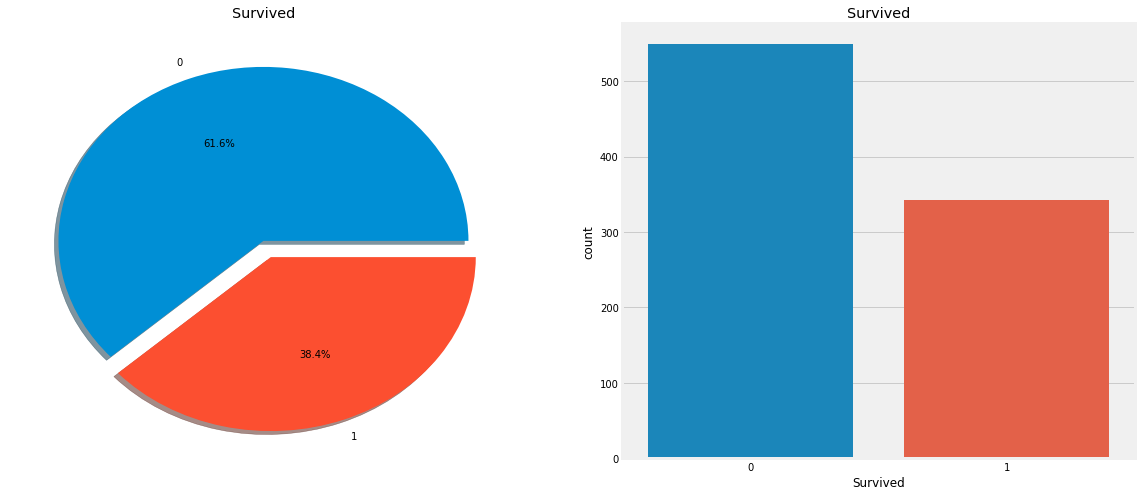

In [26]:
#dependant variable
fig,ax=plt.subplots(1,2,figsize=(18,8))
train_df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train_df,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [27]:
#feature analysis-Sex (categorical feature)
train_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

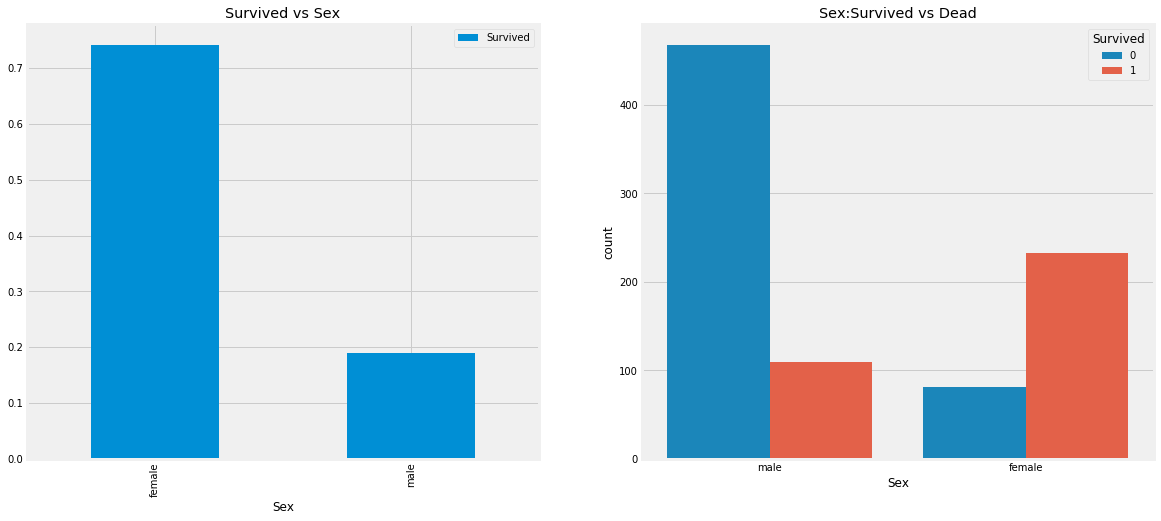

In [28]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
train_df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=train_df,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [29]:
#feature analysis-Pclass (Ordinal feature)
pd.crosstab(train_df.Pclass,train_df.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


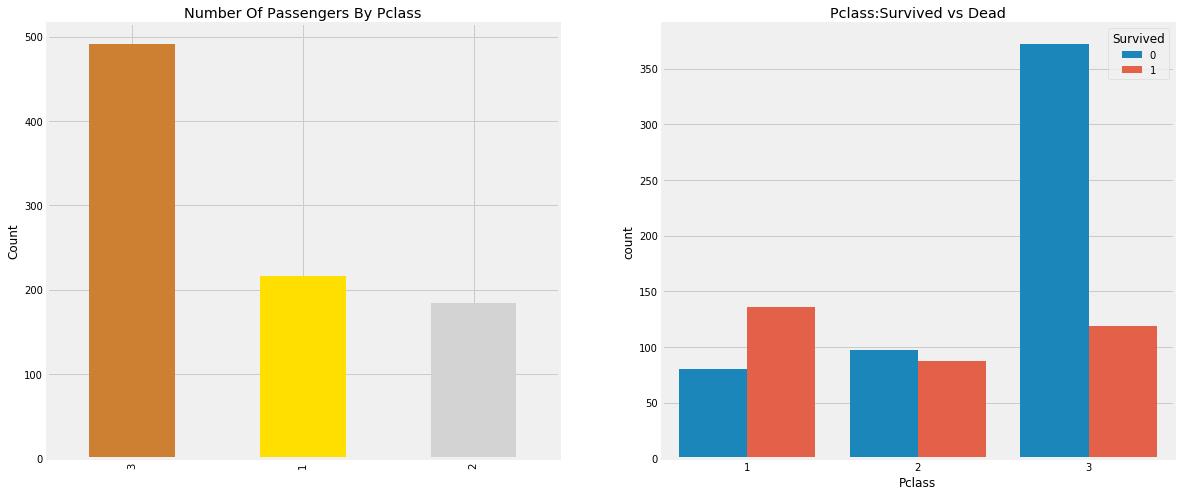

In [30]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
train_df['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=train_df,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [31]:
# feature analysis-Sex and Pclass together
pd.crosstab([train_df.Sex,train_df.Pclass],train_df.Survived,margins=True).style.background_gradient(cmap='summer_r')


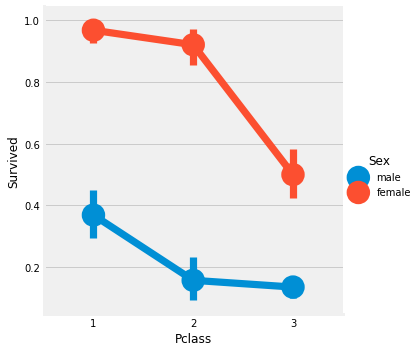

In [32]:
sns.factorplot('Pclass','Survived',hue='Sex',data=train_df)
plt.show()

In [33]:
# feature analysis-Age (Continuous feature)
print('Oldest Passenger was of:',train_df['Age'].max(),'Years')
print('Youngest Passenger was of:',train_df['Age'].min(),'Years')
print('Average Age on the ship:',train_df['Age'].mean(),'Years')


Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


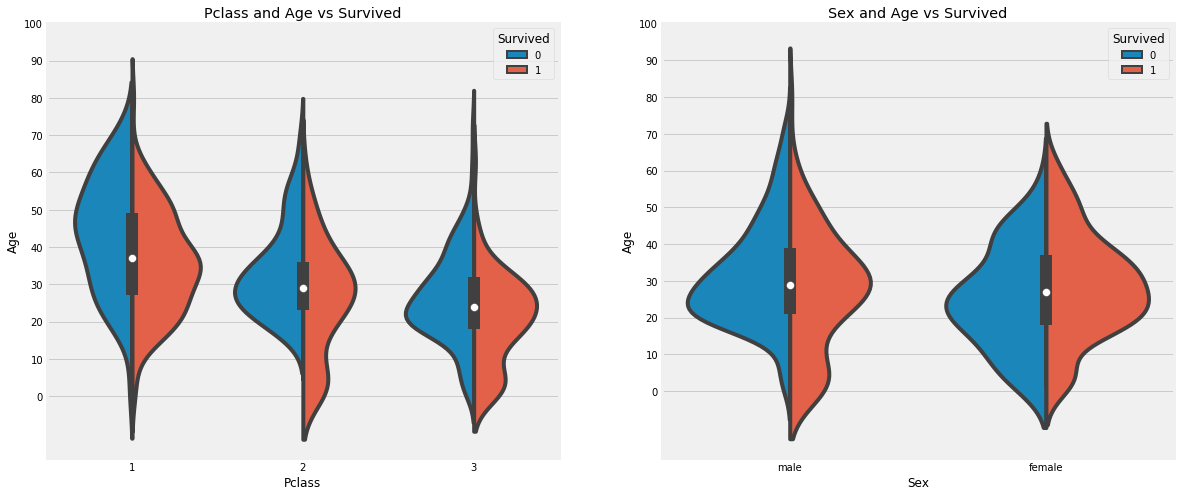

In [12]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=train_df,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train_df,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [35]:
#handle the missig value for Age
#find the Salutations and repace the NaN with the mean of age for that group
train_df['Initial']=0
for i in train_df:
    train_df['Initial']=train_df.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

pd.crosstab(train_df.Initial,train_df.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [36]:
#correct the miss-spelling and replace
train_df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [37]:
#replace the NaN with group mean of age (ceil values of the mean)
train_df.groupby('Initial')['Age'].mean() 
train_df.loc[(train_df.Age.isnull())&(train_df.Initial=='Mr'),'Age']=33
train_df.loc[(train_df.Age.isnull())&(train_df.Initial=='Mrs'),'Age']=36
train_df.loc[(train_df.Age.isnull())&(train_df.Initial=='Master'),'Age']=5
train_df.loc[(train_df.Age.isnull())&(train_df.Initial=='Miss'),'Age']=22
train_df.loc[(train_df.Age.isnull())&(train_df.Initial=='Other'),'Age']=46

In [38]:
# check if there is nay NaN value for Age 
train_df.Age.isnull().any()

False

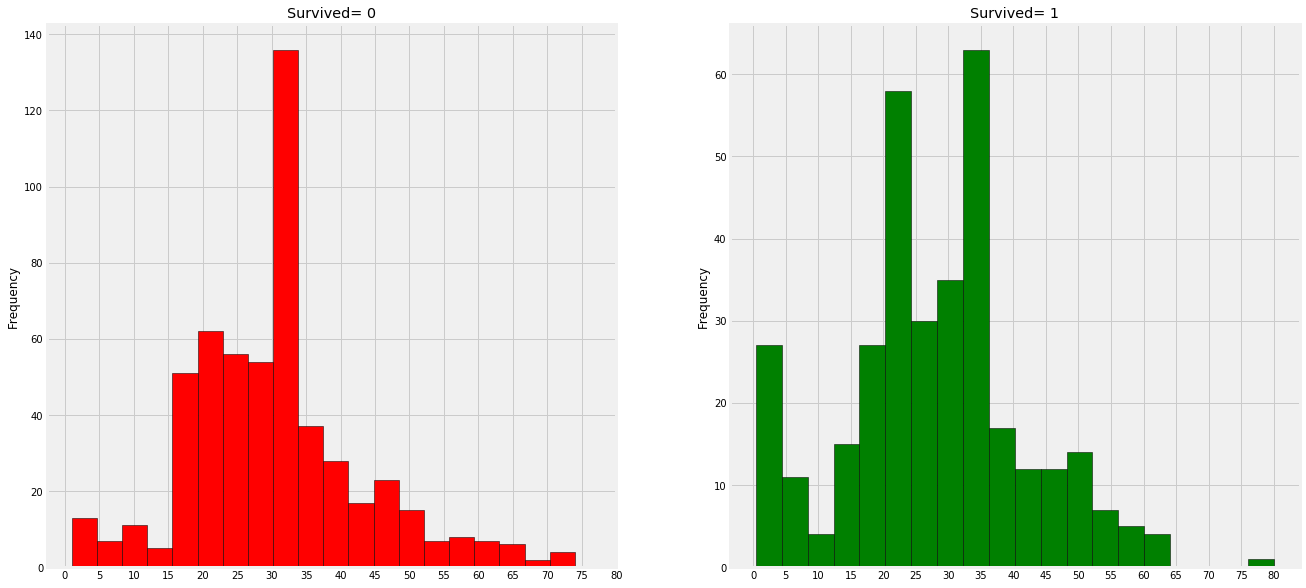

In [39]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
train_df[train_df['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train_df[train_df['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

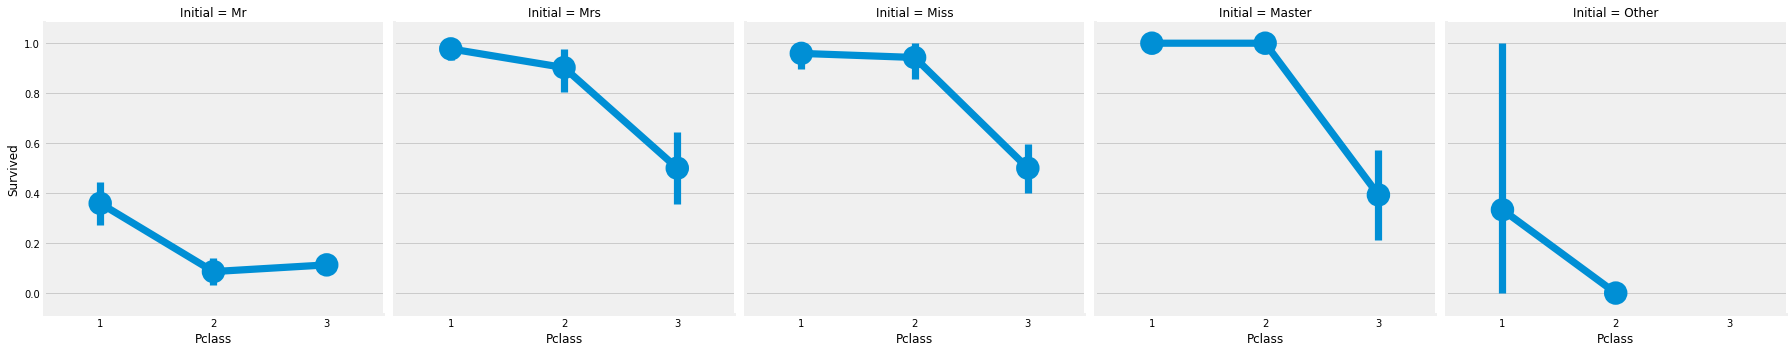

In [40]:
sns.factorplot('Pclass','Survived',col='Initial',data=train_df)
plt.show()

In [6]:
train_df.groupby(['SibSp','Survived'])['Survived'].count()

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [7]:
train_df.groupby(['Parch','Survived'])['Survived'].count()

Parch  Survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

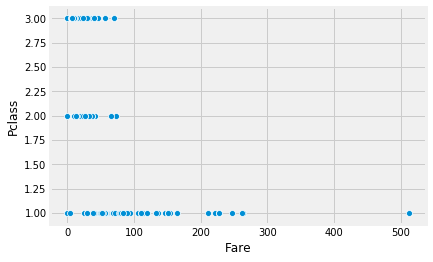

In [9]:
sns.scatterplot('Fare','Pclass',data=train_df)
plt.show()

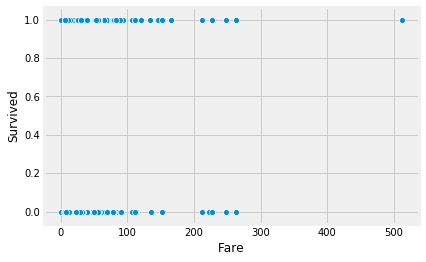

In [10]:
sns.scatterplot('Fare','Survived',data=train_df)
plt.show()

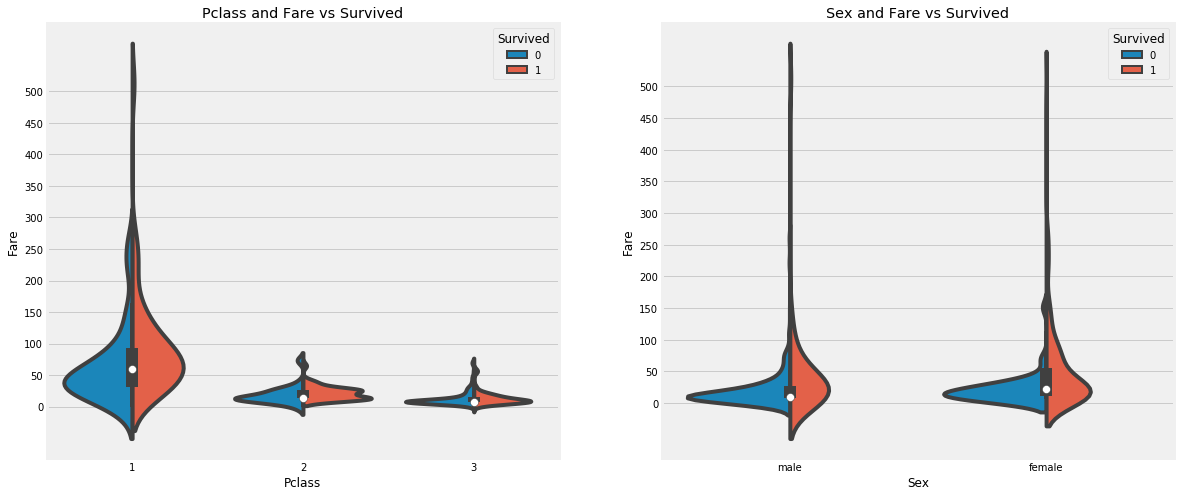

In [15]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Fare", hue="Survived", data=train_df,split=True,ax=ax[0])
ax[0].set_title('Pclass and Fare vs Survived')
ax[0].set_yticks(range(0,550,50))
sns.violinplot("Sex","Fare", hue="Survived", data=train_df,split=True,ax=ax[1])
ax[1].set_title('Sex and Fare vs Survived')
ax[1].set_yticks(range(0,550,50))
plt.show()

In [16]:
train_df['Cabin'].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
F33            3
E101           3
              ..
E31            1
C101           1
A31            1
B82 B84        1
D45            1
Name: Cabin, Length: 147, dtype: int64

In [25]:
train_df['Cabin'] = train_df['Cabin'].fillna('0')
train_df['cabin_init'] = [x[0] for x in train_df['Cabin']]
train_df['cabin_init'].unique()

array(['0', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [23]:
train_df['Cabin'].unique()

array(['0', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [26]:
pd.crosstab(train_df.cabin_init,train_df.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
cabin_init,,,
0,481,206,687
A,8,7,15
B,12,35,47
C,24,35,59
D,8,25,33
E,8,24,32
F,5,8,13
G,2,2,4
T,1,0,1


In [27]:
train_df['cabined'] = [0 if x == '0' else 1 for x in train_df['cabin_init']]
train_df['cabined'].value_counts()

0    687
1    204
Name: cabined, dtype: int64

In [28]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [29]:
train_df[train_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_init,cabined
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,B,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,B,1


In [30]:
train_df[train_df['cabin_init']=='B']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_init,cabined
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,B,1
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,B,1
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN,B,1
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,B,1
139,140,0,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2000,B86,C,B,1
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S,B,1
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C,B,1
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,B,1
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,S,B,1
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S,B,1


In [34]:
train_df['Embarked'] = train_df['Embarked'].fillna('S') 
train_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [32]:
train_df[train_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_init,cabined
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,B,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,B,1


In [41]:
#feature engineering 

In [42]:
#modeling